In [1]:
import best_brain as bb
from data_manager import LoaderOHLCV

cuda:0


In [2]:
# Train parameters
learning_rate = 0.001
num_epochs = 10 # Epoch: Passes the entire training dataset to the model once
input_file_name = 'Train_1_minute.csv'    

In [3]:
# model_name has to end with pth
model_name = "CleanupTest.pth"
bb.model_path = bb.create_model_path(model_name)

In [4]:
# Loads model to device
bb.model.to(bb.device)

LSTM(
  (lstm): LSTM(1, 8, batch_first=True)
  (fc): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [5]:
# Loads an prepares dataset
DataManager = LoaderOHLCV(bb.look_back,bb.features_columns,bb.load_data_mode, input_file=input_file_name)
X_train, X_test, y_train, y_test = DataManager.get_data_as_tensor()
train_dataset, test_dataset = DataManager.to_dataset(X_train, X_test, y_train, y_test)
train_loader, test_loader = DataManager.to_dataLoader(train_dataset, test_dataset, bb.batch_size)

loading raw data
shape of loadet data (1097200, 1)
shape of prepared data (1097190, 11)
                     Target_vlaue_difference  Close_difference  \
Date                                                             
2022-01-01 00:10:00                        0          0.018740   
2022-01-01 00:11:00                        0         -0.145387   
2022-01-01 00:12:00                        1         -0.051239   
2022-01-01 00:13:00                        1          0.087192   
2022-01-01 00:14:00                        0          0.007576   

                     Close_difference(t-1)  Close_difference(t-2)  \
Date                                                                
2022-01-01 00:10:00              -0.046408              -0.076053   
2022-01-01 00:11:00               0.018740              -0.046408   
2022-01-01 00:12:00              -0.145387               0.018740   
2022-01-01 00:13:00              -0.051239              -0.145387   
2022-01-01 00:14:00               0

In [6]:
# Trains model
bb.train_model(train_loader, num_epochs, learning_rate)


Epoch: 0
Batch 100, Loss: 0.697
Batch 200, Loss: 0.695
Batch 300, Loss: 0.693
Batch 400, Loss: 0.693
Batch 500, Loss: 0.693
Batch 600, Loss: 0.692
Batch 700, Loss: 0.692
Batch 800, Loss: 0.693
Batch 900, Loss: 0.693
Batch 1000, Loss: 0.693
Batch 1100, Loss: 0.693
Batch 1200, Loss: 0.693
Batch 1300, Loss: 0.693
Batch 1400, Loss: 0.692
Batch 1500, Loss: 0.692
Batch 1600, Loss: 0.693
Batch 1700, Loss: 0.693
Batch 1800, Loss: 0.693
Batch 1900, Loss: 0.693
Batch 2000, Loss: 0.693
Batch 2100, Loss: 0.692
Batch 2200, Loss: 0.693
Batch 2300, Loss: 0.694
Batch 2400, Loss: 0.693
Batch 2500, Loss: 0.693
Batch 2600, Loss: 0.692
Batch 2700, Loss: 0.693
Batch 2800, Loss: 0.691
Batch 2900, Loss: 0.693
Batch 3000, Loss: 0.691
Batch 3100, Loss: 0.694
Batch 3200, Loss: 0.693
Batch 3300, Loss: 0.692
Batch 3400, Loss: 0.694
Batch 3500, Loss: 0.693
Batch 3600, Loss: 0.693
Batch 3700, Loss: 0.693
Batch 3800, Loss: 0.693
Batch 3900, Loss: 0.691
Batch 4000, Loss: 0.693
Batch 4100, Loss: 0.693
Batch 4200, Los

creating train graph


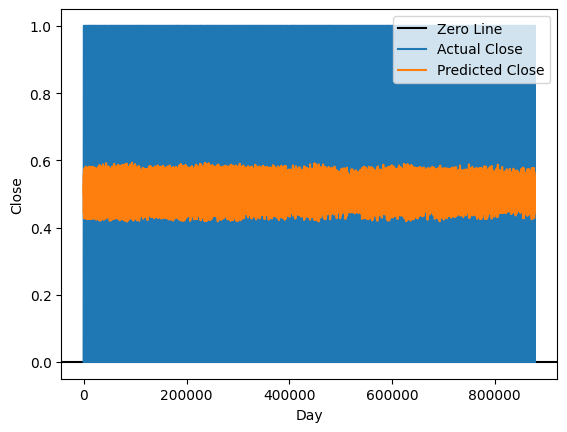

creating test graph


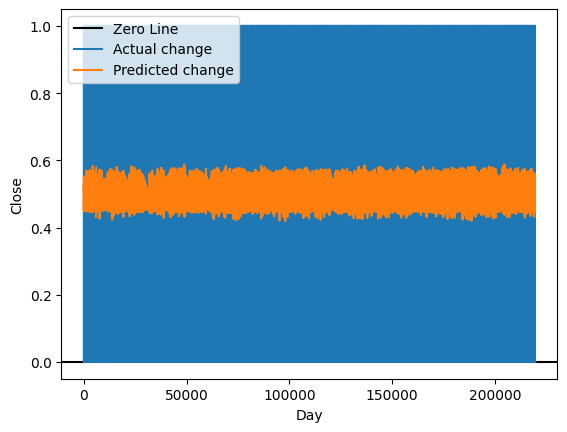

In [7]:
# Creates grpahs
bb.create_train_graph(X_train, y_train)
bb.create_test_graph(X_test, y_test)